# csv to datashader

In [1]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf

In [2]:
#imports csv data
df = pd.read_csv('bifurcx_0p205to0p226_10000.csv', names=['x_col', 'y_col'],)
#generates image
cvs = ds.Canvas(plot_width=1500, plot_height=800)
agg = cvs.points(df, 'x_col', 'y_col')
img = tf.shade(agg, cmap=['lightblue', 'darkblue'], how='log')
img = tf.set_background(img, color='white')

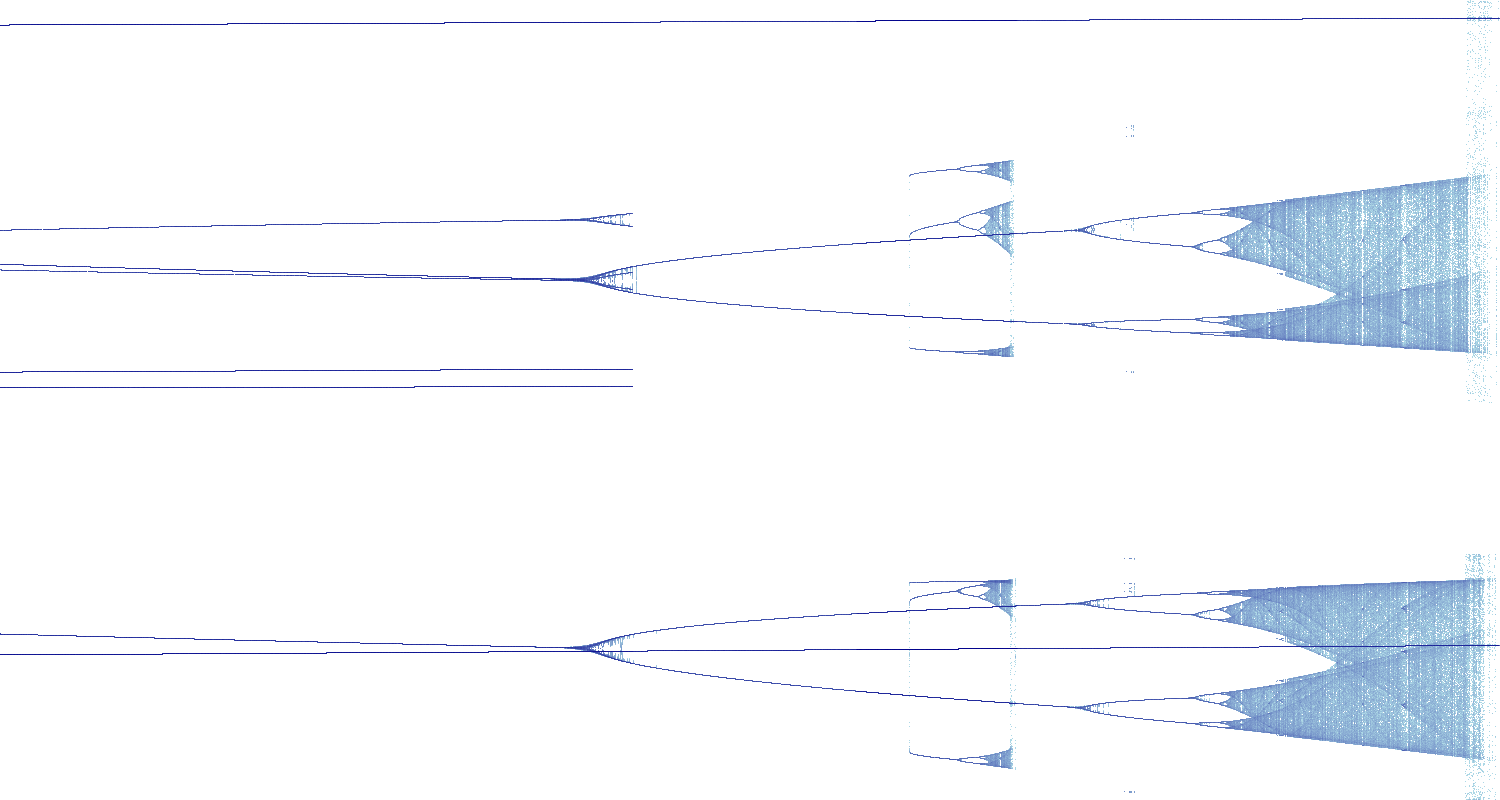

In [15]:
img

## Interactive plot


In [3]:
from datashader.bokeh_ext import InteractiveImage
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display
from bokeh.plotting import figure, output_notebook, output_file, show
from bokeh.resources import INLINE
output_notebook(resources=INLINE)

Loading BokehJS ...

In [12]:
x_range, y_range = ((df.x_col.min(),df.x_col.max()), (df.y_col.min(),df.y_col.max()))

def base_plot(tools='pan,wheel_zoom,reset,save'):
    p = figure(tools=tools, plot_width=800, plot_height=600,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=30, min_border_right=0,
        min_border_top=0, min_border_bottom=30)   
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.xaxis.axis_label = 'q'
    p.yaxis.axis_label = 'p'
    return p

p = base_plot()
    
#plot_width=800
#plot_height=600
    
def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'x_col', 'y_col')   
    img = tf.shade(agg, cmap=['lightblue','darkblue'], how='eq_hist')
   # img = tf.set_background(img,color = 'black')
  # img = tf.spread(img,px=5)
    #img = tf.shade(agg, cmap=Hot, how='eq_hist')
    return img

p = base_plot()

In [13]:
InteractiveImage(p, create_image)

1: 0.213 pm 0.0001
2: 0.2201 pm 0.00005
3: 0.2217 pm 0.00002
4: 0.22207 pm 0.00001
5: 0.222156 pm 0.000004